# Init and create the first neuron.

In [1]:
import nest
import pylab

neuron = nest.Create("iaf_psc_alpha")
nest.GetStatus(neuron, ["V_reset", "V_th"])

((-70.0, -55.0),)

**Set status to the neuron.**

In [2]:
nest.SetStatus(neuron, {"I_e": 376.0})

**Create Devices to measure the neuron.**

In [3]:
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime": True, "record_from": ["V_m"]})
spikeDetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

**Connect the devices to the neuron**

In [4]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikeDetector)

**Run Simulation**

In [5]:
nest.Simulate(1000.0)

**Recover data from simulation and plot.**

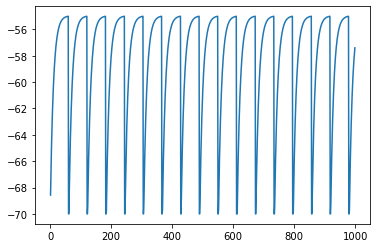

In [6]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

pylab.figure(1)
pylab.plot(ts, Vms)
pylab.show()

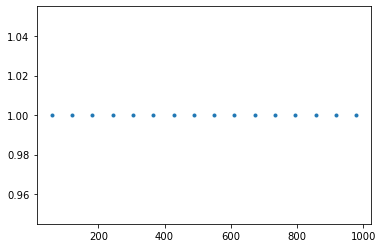

In [7]:
dSD = nest.GetStatus(spikeDetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()